In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import MultipleLocator
%matplotlib inline

In [2]:
def original_data_func(attack_type="random", x_axis="byzantines", dataset='mnist'):
    file_addr = attack_type + "_" + x_axis
    
    mnist_list = ['mnist.1','mnist.2','mnist.3','mnist.4','mnist.5',]
    fashion_list = ['fashion.1','fashion.2','fashion.3','fashion.4','fashion.5',]
    cifar_list = ['cifar.1', 'cifar.2', 'cifar.3', 'cifar.4', 'cifar.5', ]

    framework_list = ['FedAvg[1]', 'FLPhish(τ=0.1)', 'FLPhish(τ=0.2)', 'FLPhish(τ=0.5)', 'FLPhish(weight)']
    byzantines_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    imbalances_list = [0.1,0.2,0.5,0.6,0.7,0.8]
    
    df = pd.read_csv("FLPhish_plots/"+file_addr+"/"+file_addr+".csv", sep="\t", index_col=0)
    df=df.dropna(axis=0)
    
    if(dataset=='mnist'):
        df = df[mnist_list]
    elif(dataset=='fashion'):
        df = df[fashion_list]
    elif(dataset=='cifar'):
        df = df[cifar_list]
    df.columns = framework_list
    return df

In [3]:
original_data_func()

,FedAvg[1],FLPhish(τ=0.1),FLPhish(τ=0.2),FLPhish(τ=0.5),FLPhish(weight)
dataset,,,,,
0.1,98.64,94.40,94.15,94.65,94.55
0.2,95.71,93.75,94.05,94.50,94.10
0.3,83.92,94.15,94.25,94.30,94.35
0.4,15.11,94.65,94.10,94.50,94.50
0.5,40.06,94.00,94.35,94.30,94.15
0.6,61.50,93.90,93.40,93.70,94.00
0.7,40.43,93.60,94.10,93.90,93.45
0.8,9.76,94.20,93.85,93.80,93.90
0.9,17.20,93.40,94.20,94.10,93.90


In [4]:
def sota_data_func(attack_type='random', x_axis="byzantines", dataset='mnist', defense_method = "Median"):
    
    folder_addr = "sota_data/"+defense_method+"/"+attack_type+"/"+dataset+"/"
    byzantines_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    
    accuracy_list = []
    if(x_axis=="byzantines"):
        for byzantine in byzantines_list:
            temp_df = pd.read_csv(folder_addr+str(byzantine)+".csv", index_col=0)
            if(byzantine==0.5):
                accuracy_val = temp_df.iloc[2,-1]
            else:
                accuracy_val = temp_df.iloc[0,-1]
            accuracy_list.append(accuracy_val)

    if(x_axis == "imbalances"):
        temp_df = pd.read_csv(folder_addr+"0.5.csv", index_col=0)
        accuracy_list = list(temp_df.iloc[:,-1])
    return accuracy_list

In [5]:
def all_data(attack_type="random", x_axis="byzantines", dataset='mnist'):
    original_data =  original_data_func(attack_type, x_axis, dataset)
    median_accuracy_list = sota_data_func(attack_type, x_axis, dataset, "Median")
    trimmed_accuracy_list = sota_data_func(attack_type, x_axis, dataset, "TrimmedMean")
    
    
    original_data['Median[29]']=median_accuracy_list
    original_data['Trimmed Mean[29]']=trimmed_accuracy_list
    
    return original_data

In [6]:
def data_plot(attack_type="random", x_axis="byzantines", dataset='mnist'):
    
    if(dataset=='mnist'):
        dataset_label = "MNIST"
    elif(dataset == 'fashion'):
        dataset_label = "Fashion-MNIST"
    elif(dataset == 'cifar'):
        dataset_label = 'Cifar-10'
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6), dpi=200)
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    framework_list = ['FedAvg[1]', 'Median[29]', 'Trimmed Mean[29]', 'FLPhish(τ=0.1)[48]', 'FLPhish(τ=0.2)[48]', 'FLPhish(τ=0.5)[48]', 'FLPhish(weight)']
    
    temp_df = all_data(attack_type, x_axis, dataset)
    x_major_locator=MultipleLocator(0.1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    color_list = ['b', 'orange', 'g', 'tomato', 'royalblue','slategray', 'crimson']
    plot_fig = sns.lineplot(data=temp_df, markers=True, linewidth=5, hue_order = framework_list, palette=color_list)
    plt.legend(labels=framework_list, title = "Framework", 
               fontsize = '12', title_fontsize = "12", loc='lower left')
    if(dataset=='cifar'):
        plt.ylim(0,60)
    else:
        plt.ylim(0, 100)
    plt.legend(fontsize=18, loc="lower left")
    if(x_axis=="byzantines"):
        plt.xlabel('Fractions of Byzantine clients', fontsize=22)
    elif(x_axis=="imbalances"):
        plt.xlabel('Imbalance Degrees', fontsize=22)
    plt.ylabel('Accuracy(%)', fontsize=22)
    #plt.tick_params(labelsize=18)
    plot_fig = plot_fig.get_figure()
    plot_fig.savefig("plots"+"/"+"table_"+ attack_type +"_"+x_axis+"_" +dataset_label+ ".pdf",bbox_inches = 'tight')

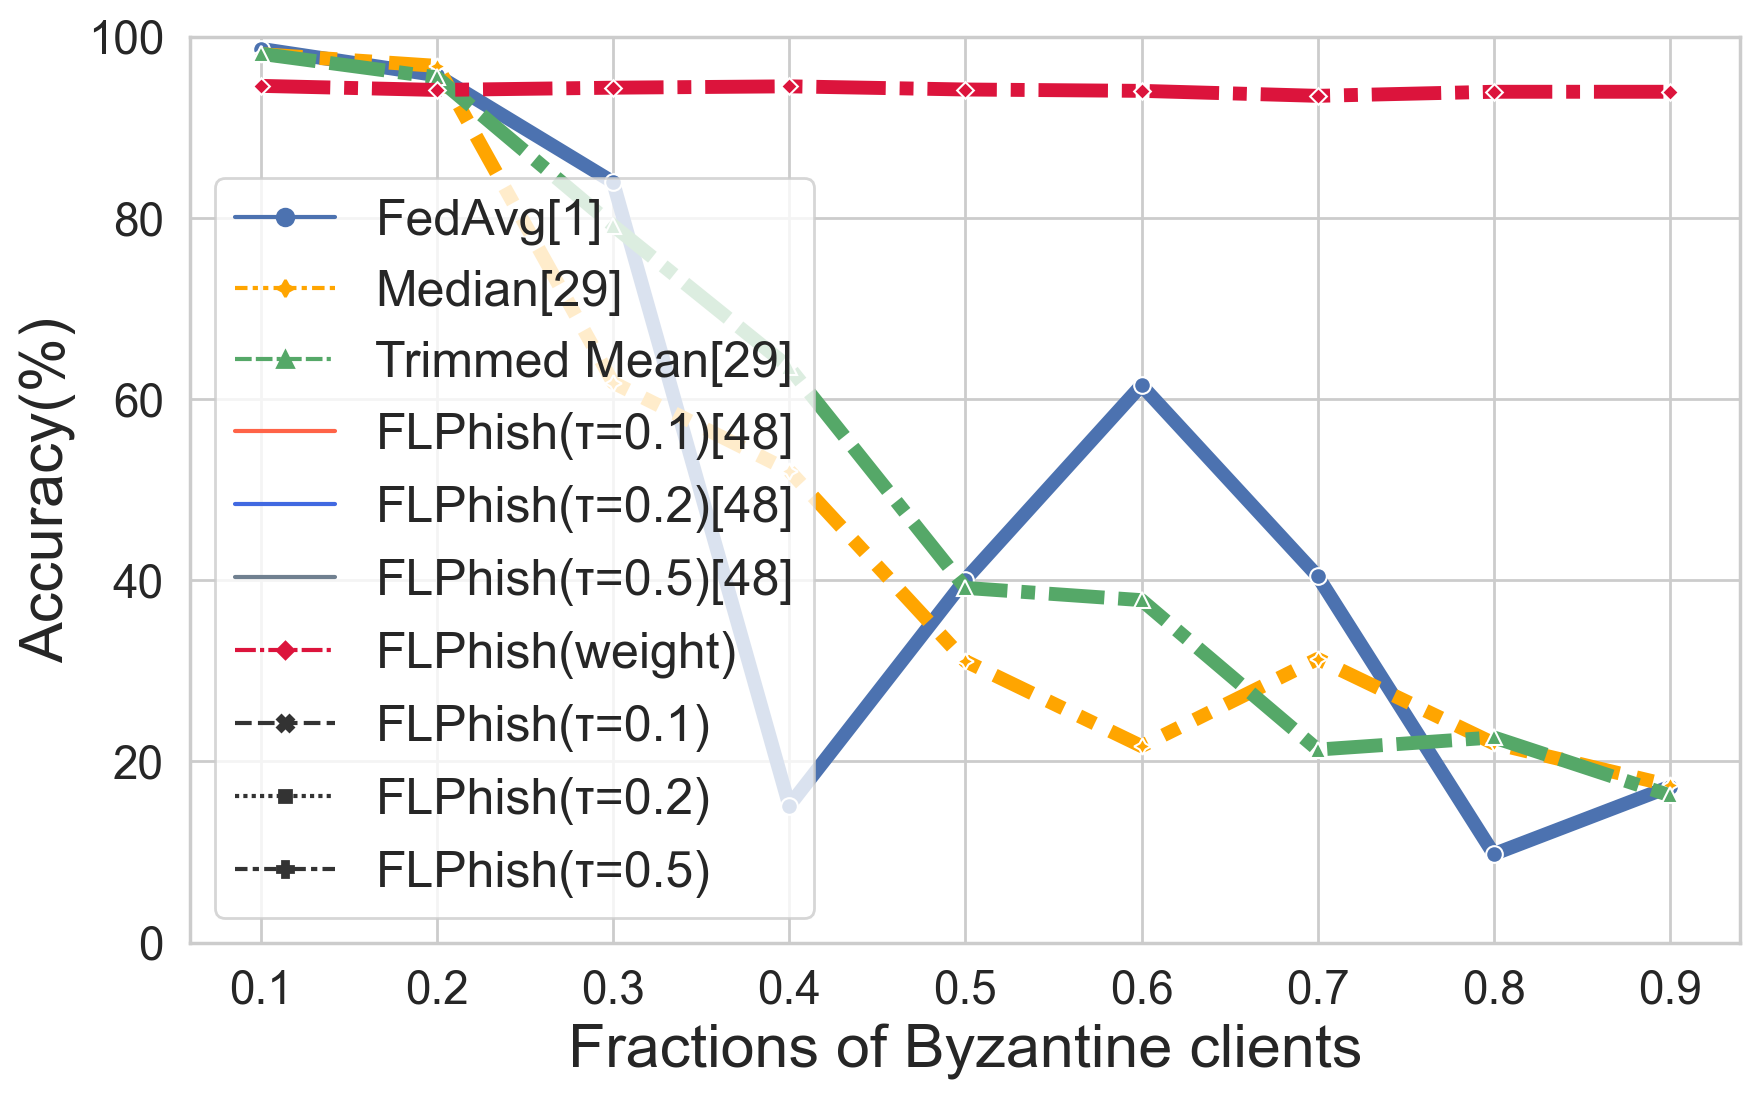

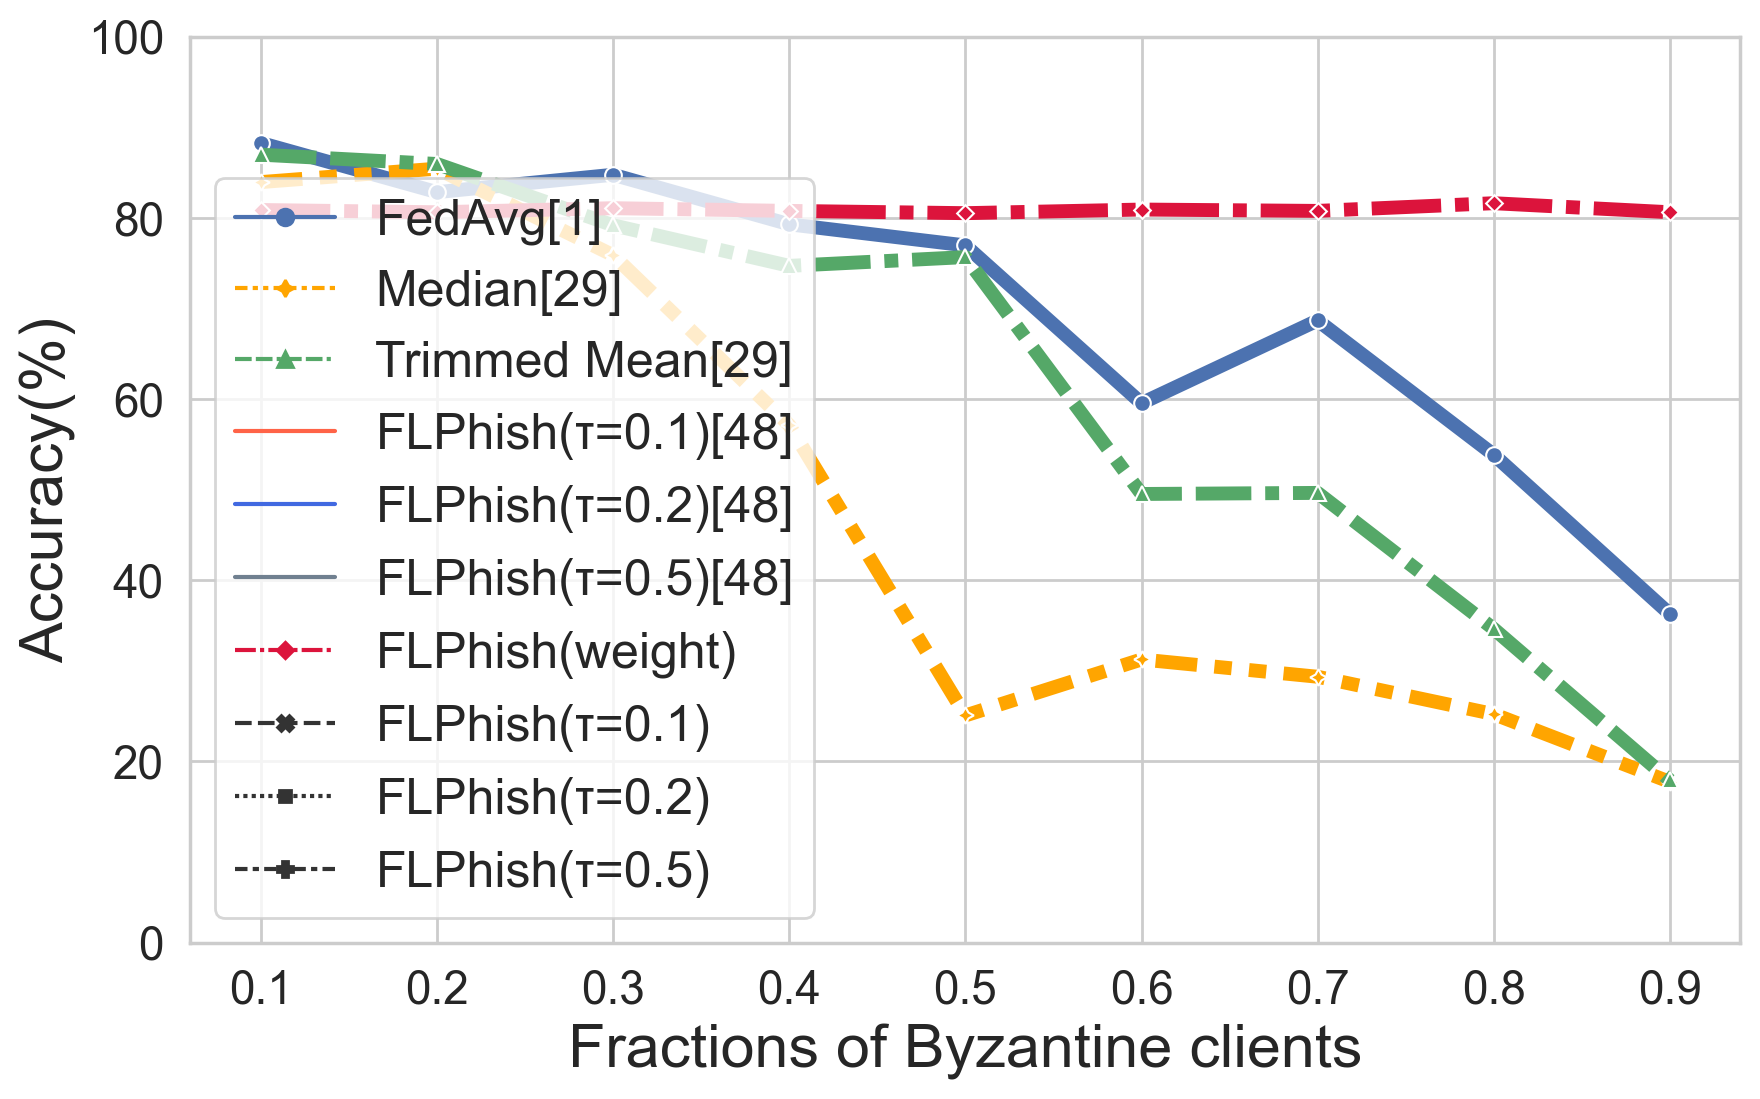

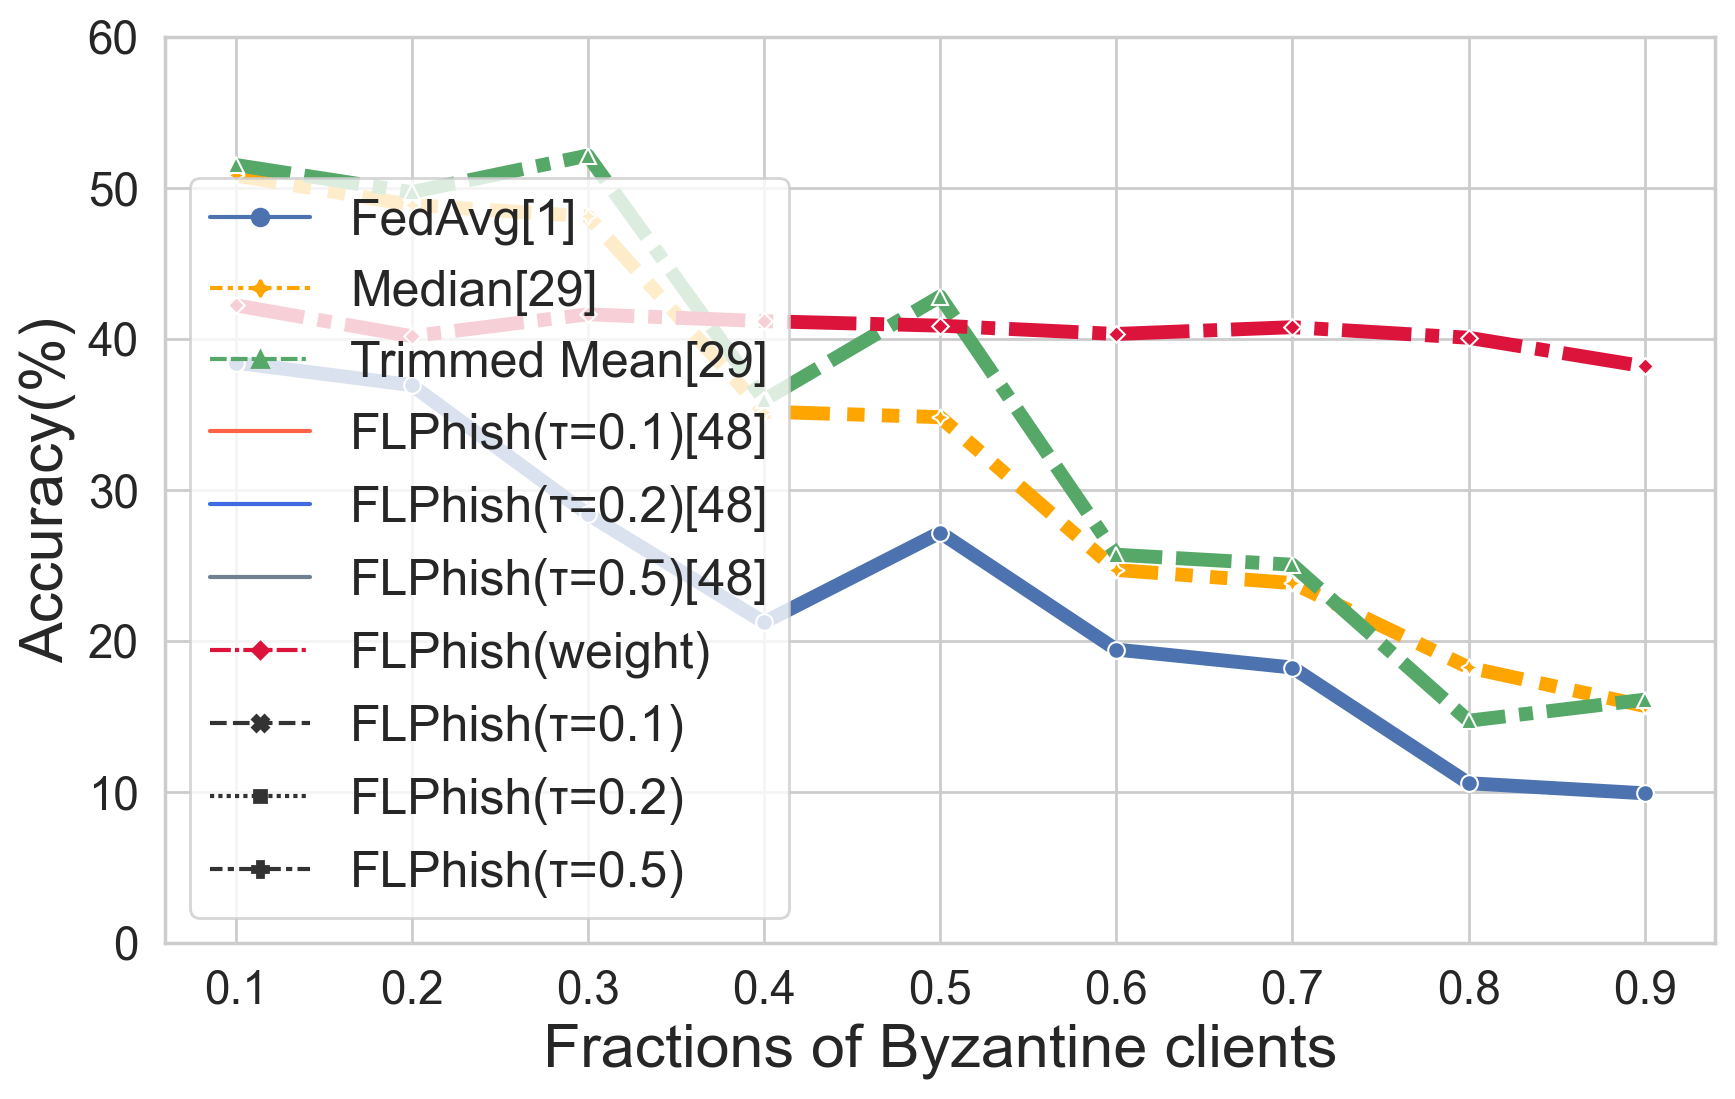

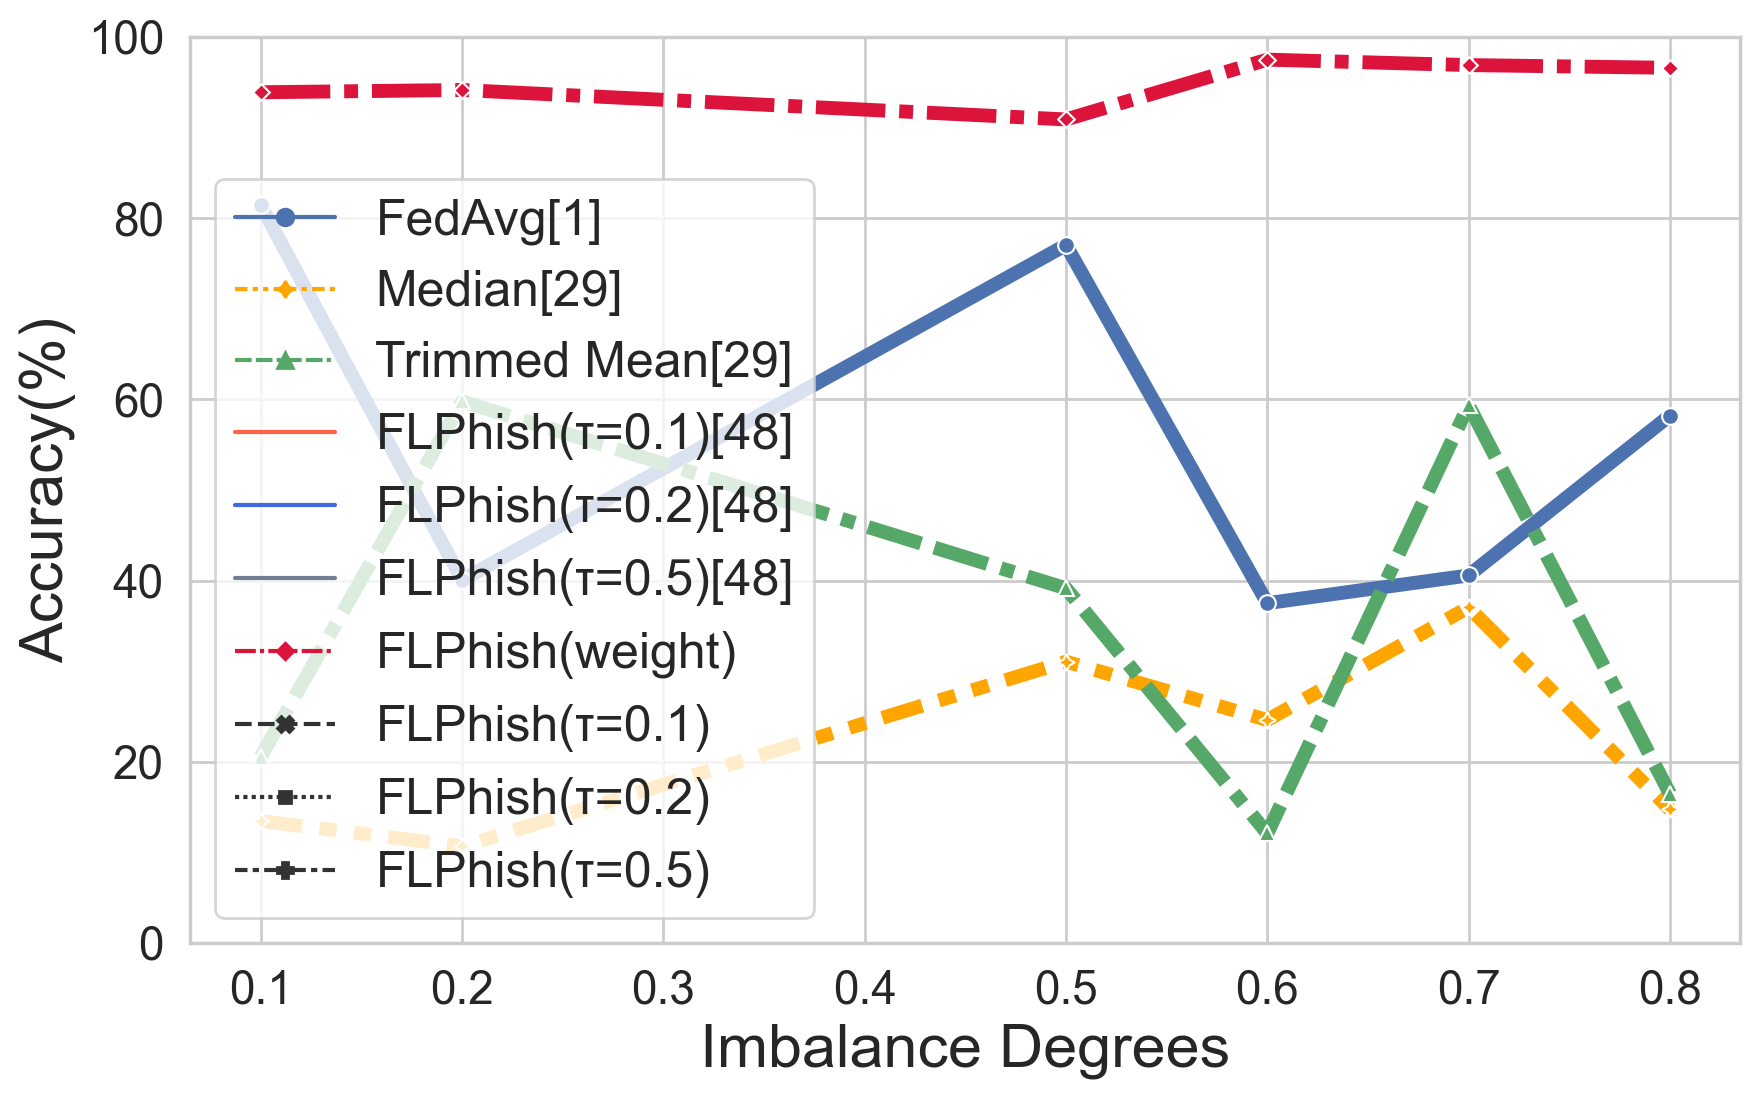

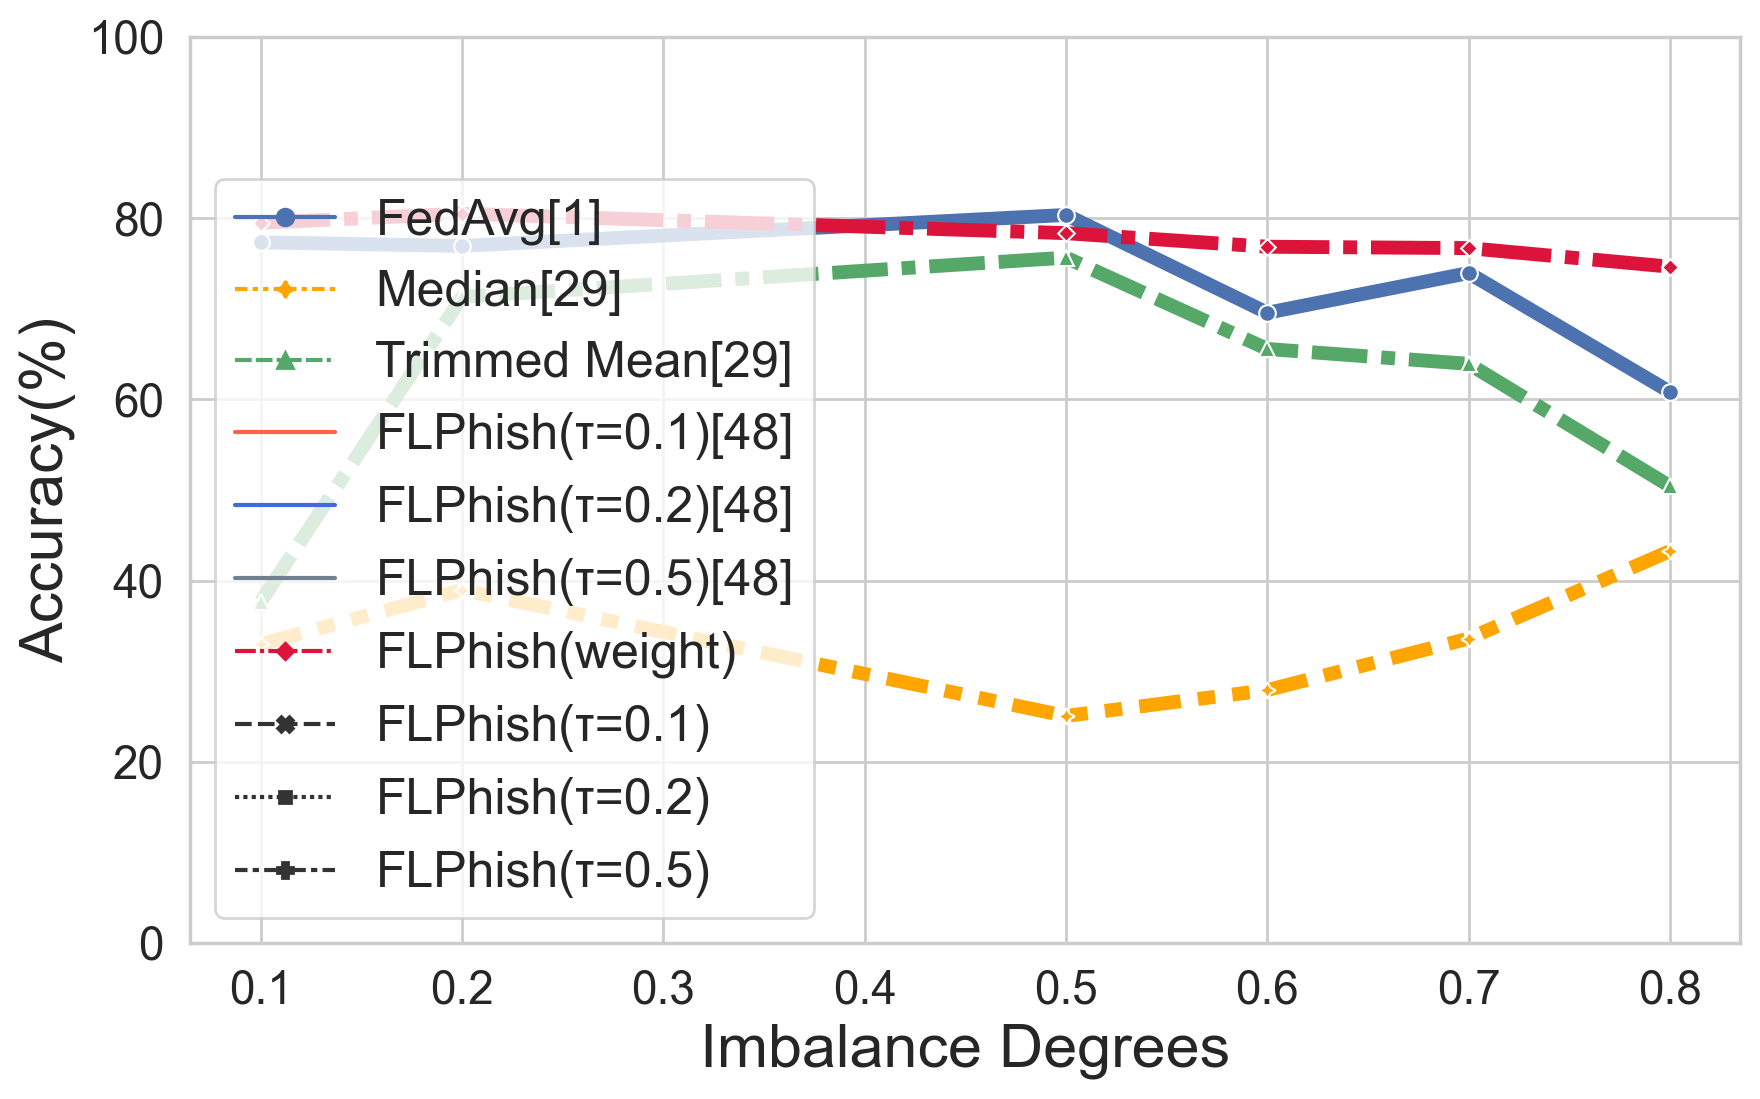

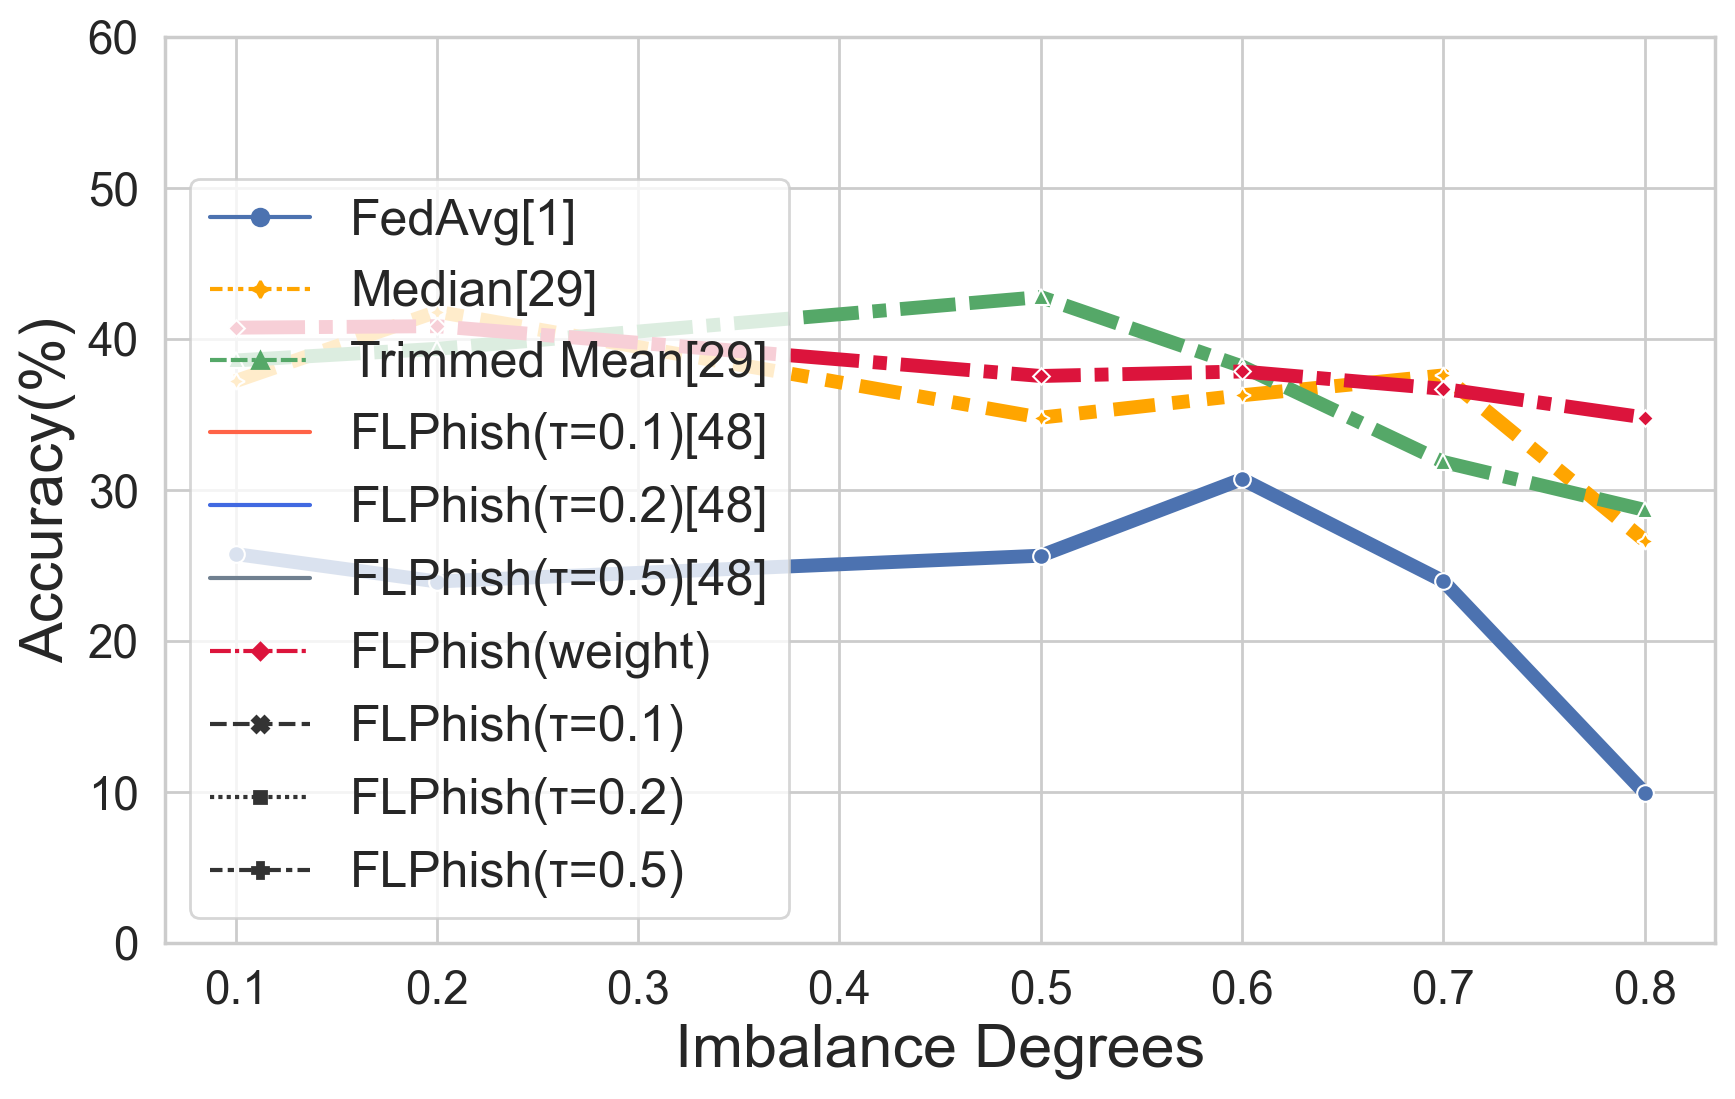

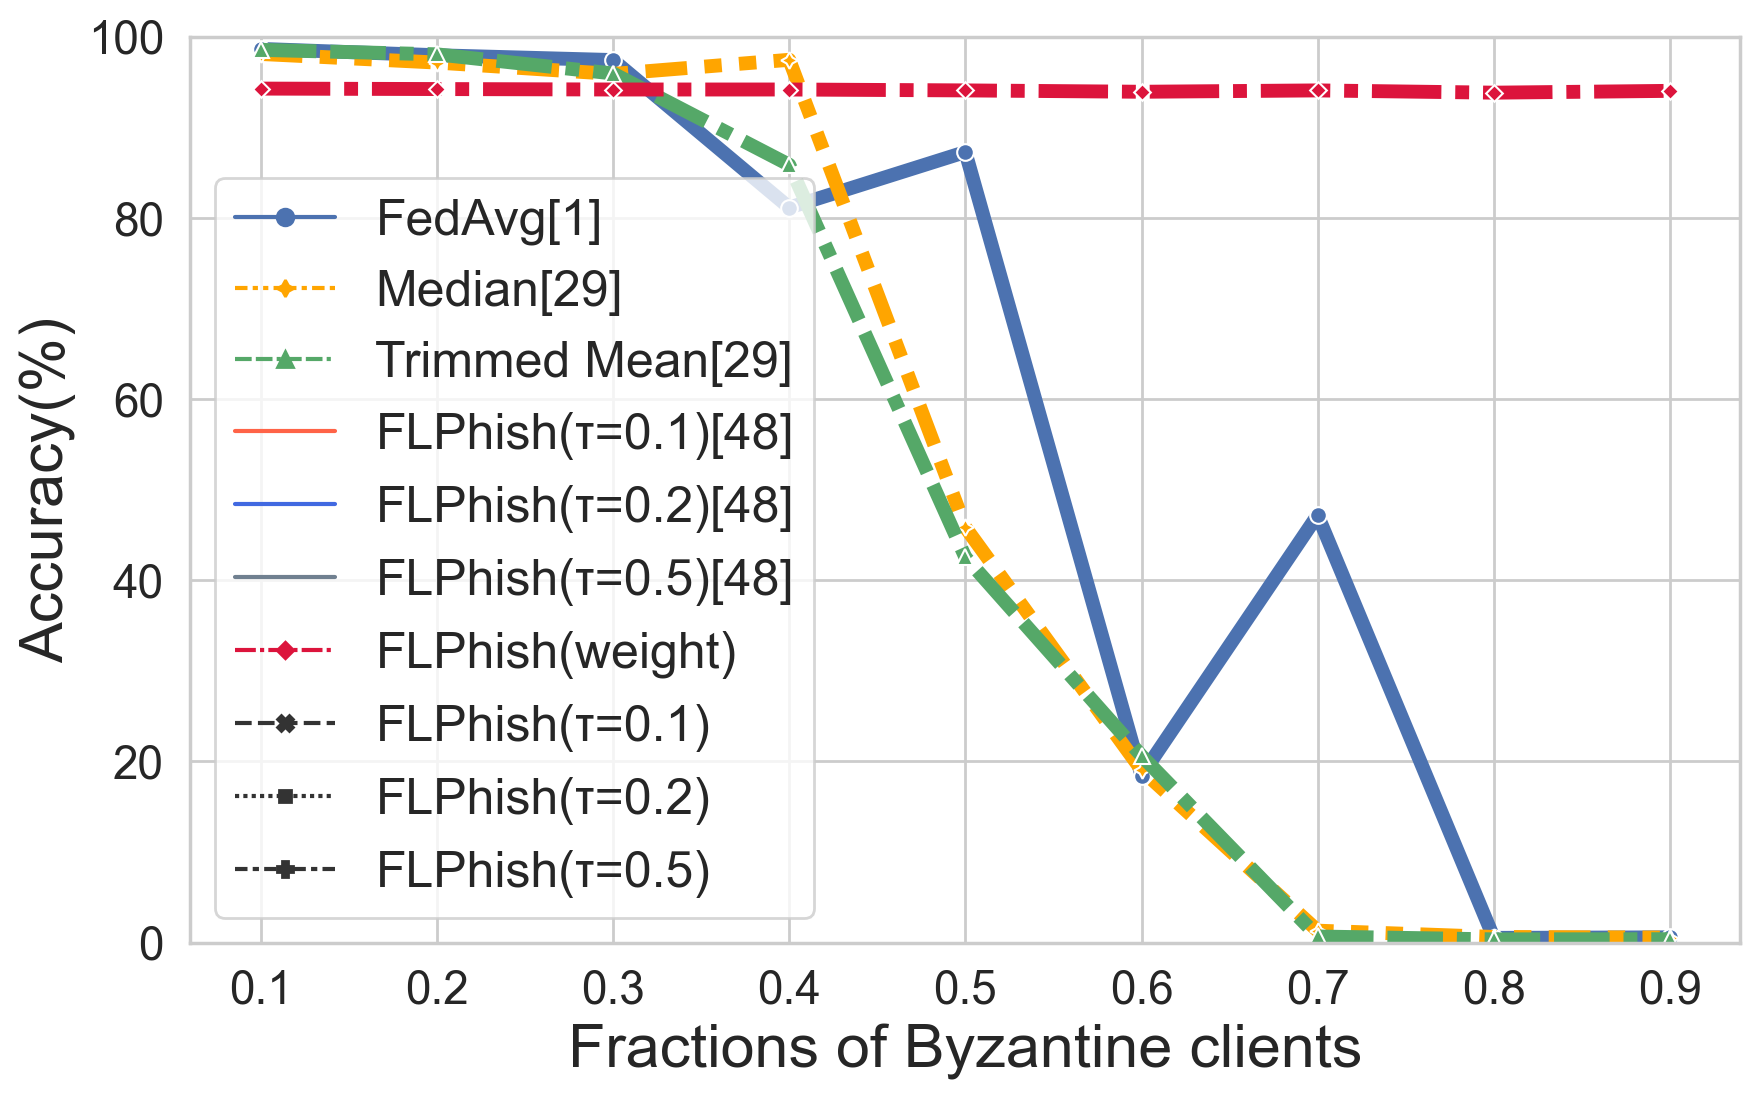

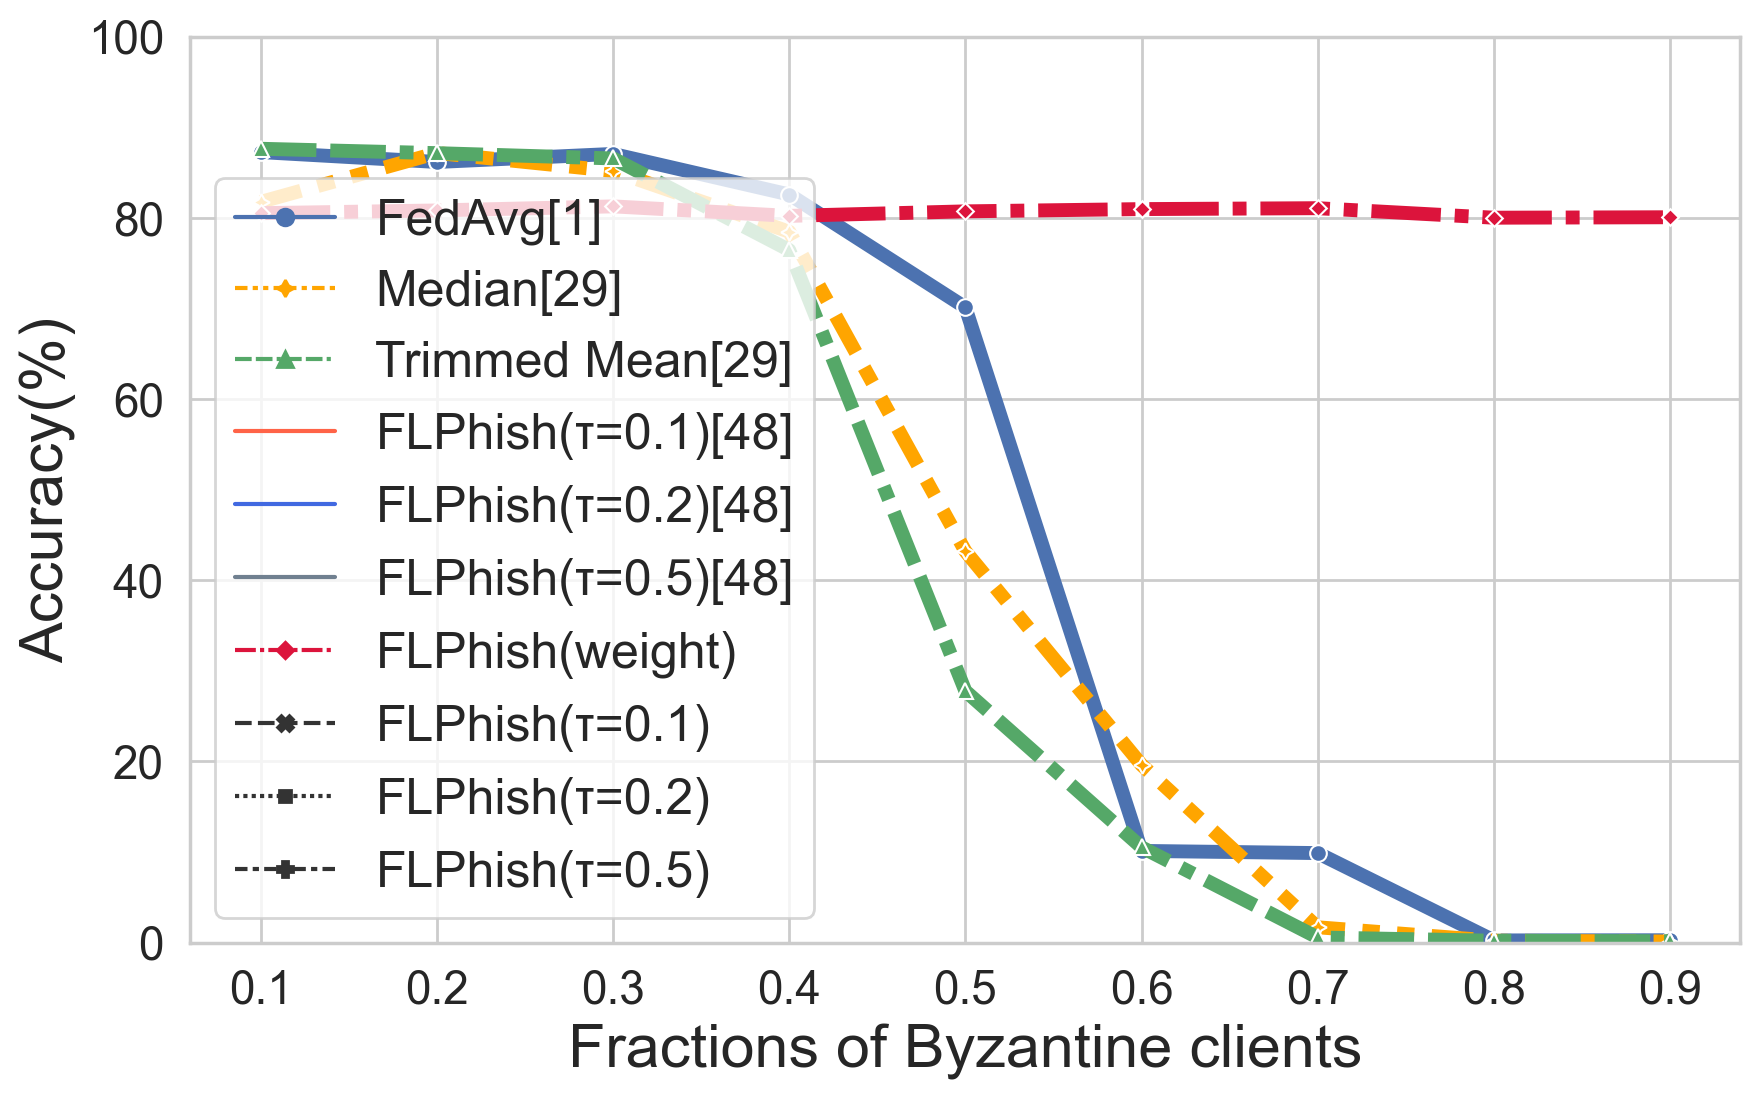

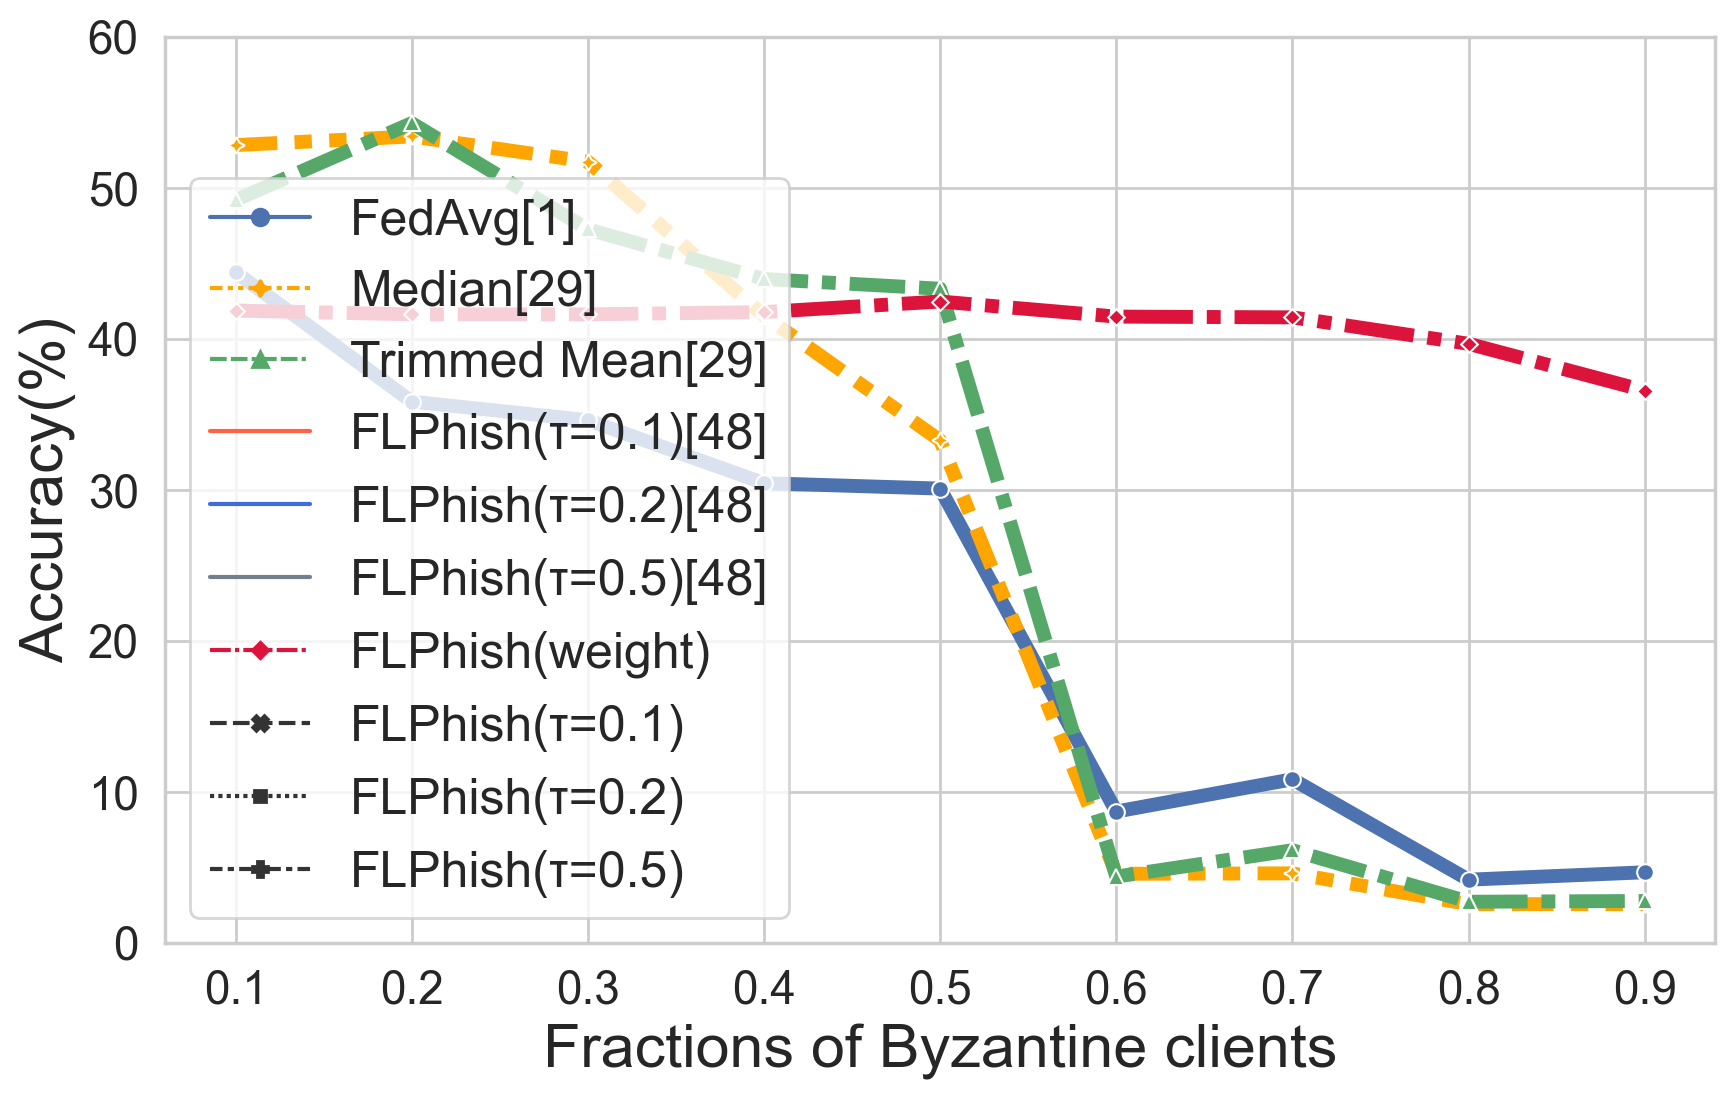

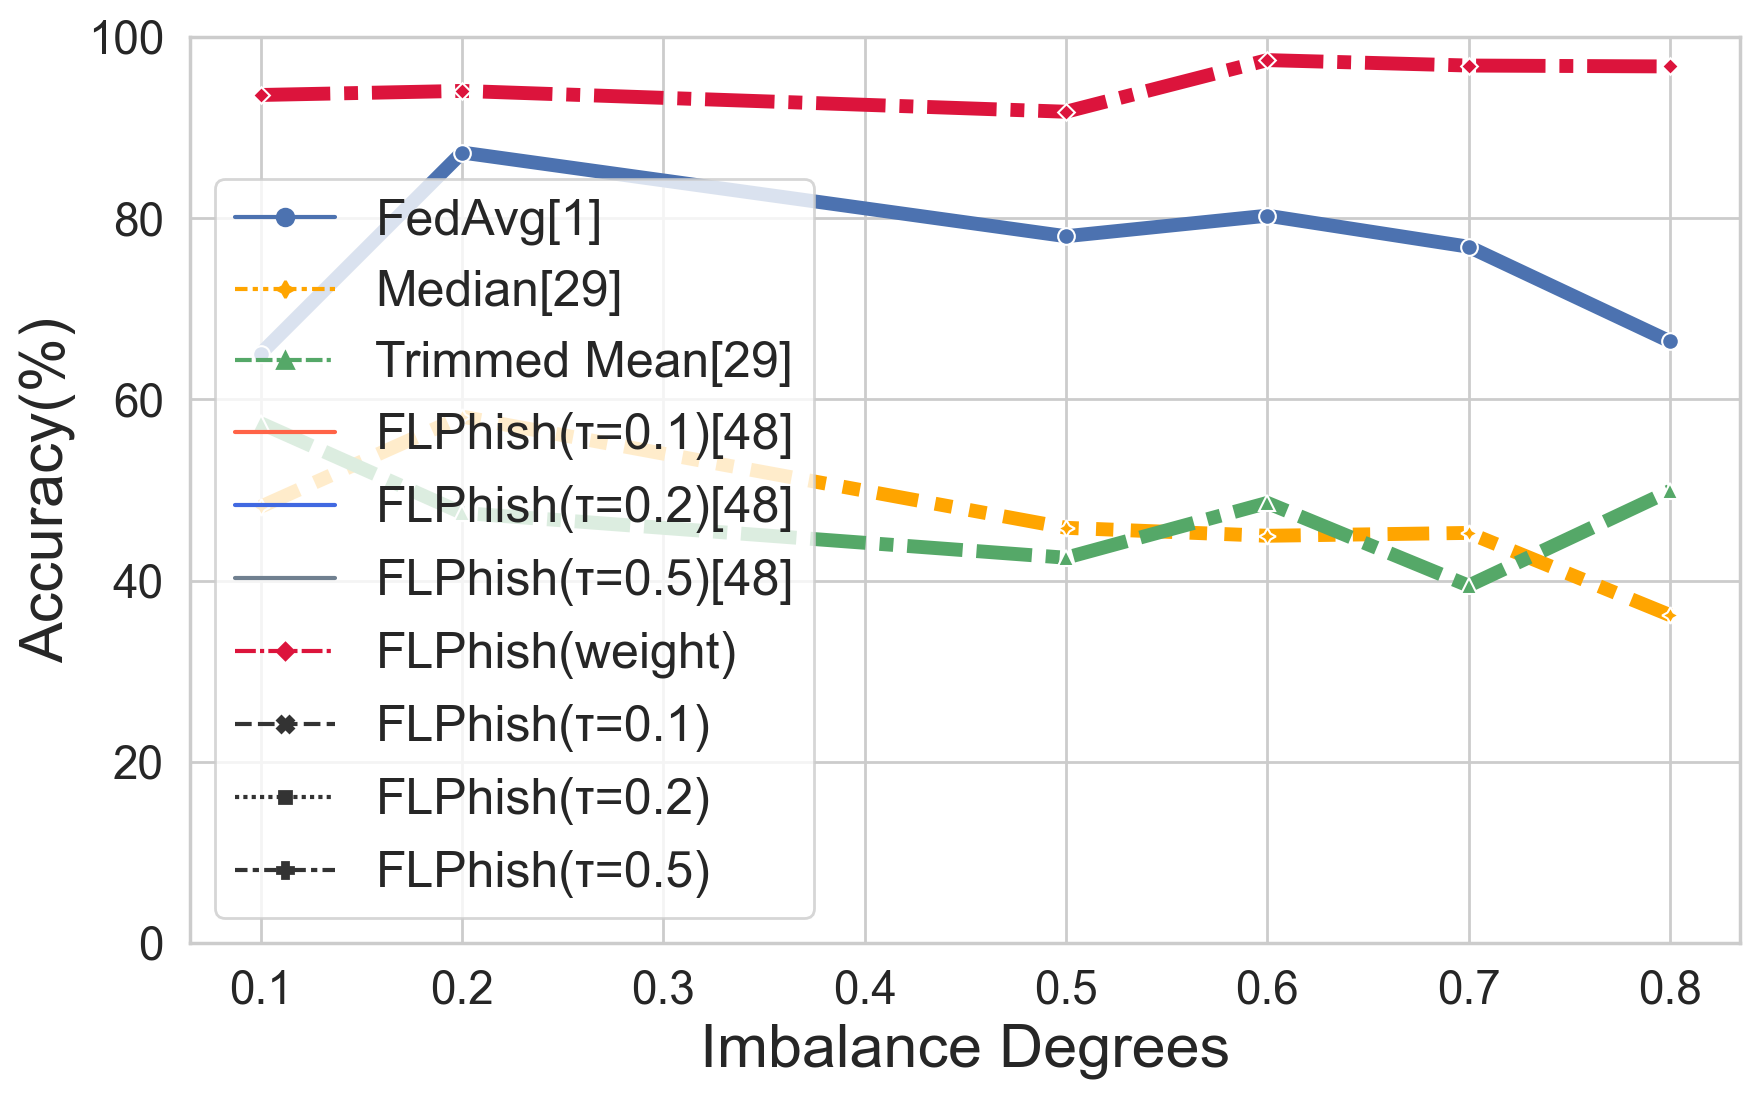

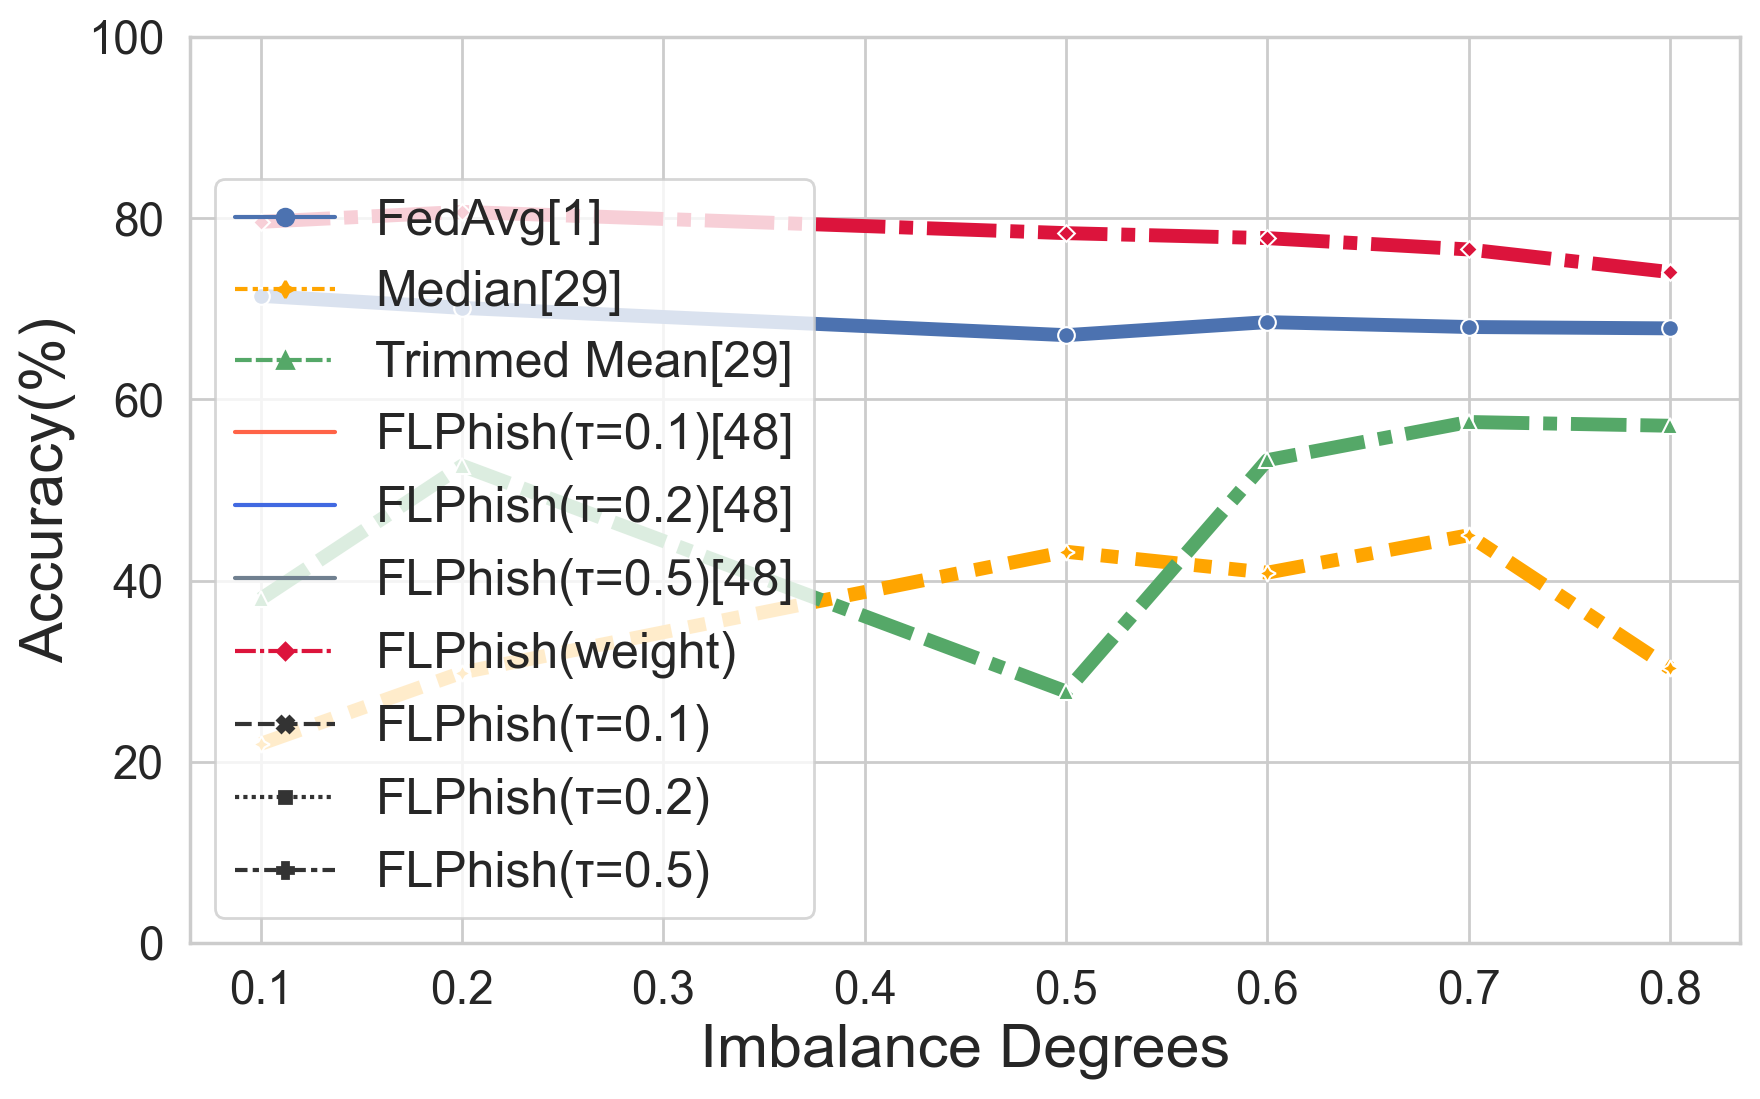

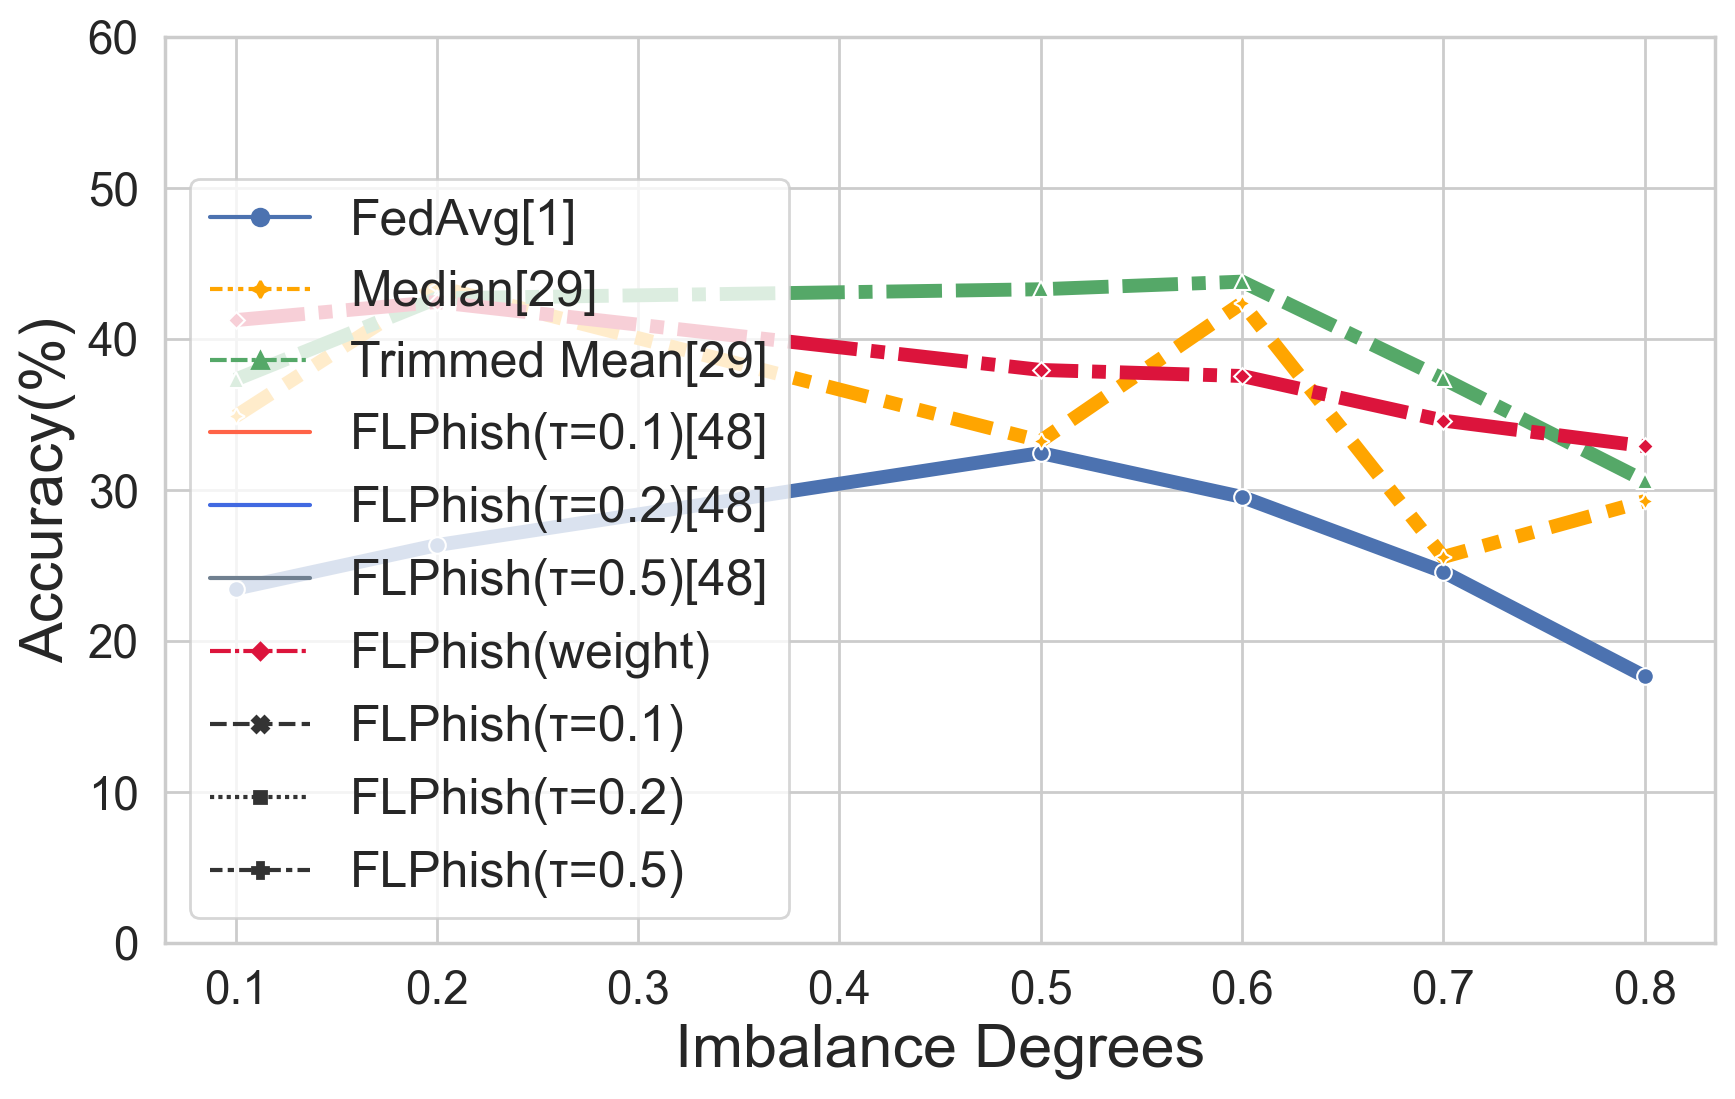

In [7]:
attack_type_list = ['random', 'untargeted']
x_axis_list = ["byzantines", "imbalances"]
dataset_list = ['mnist', 'fashion', 'cifar']

for attack_type in attack_type_list:
    for x_axis in x_axis_list:
        for dataset in dataset_list:
            data_plot(attack_type, x_axis, dataset)